# INSURANCE CHARGES PREDICTION - Linear Regression Model

## Hiya Kulasrestha

###### Contact - 9971474317
###### Email - kulasresthahiya@gmail.com


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
## importing the dataset from github repository

url = 'https://raw.githubusercontent.com/hiyakulasrestha/Insurance-Charges-Prediction/main/insurance.csv'
df = pd.read_csv(url)

In [ ]:
## viewing the datafram

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
## detailed information about dataset columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
## details on the column values

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
## checking if there are any missin values - none found

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### AGE - details about the age column

In [ ]:
df['age'].value_counts().head()

18    69
19    68
50    29
51    29
47    29
Name: age, dtype: int64

In [ ]:
df['age'].value_counts().tail()

61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

<Axes: >

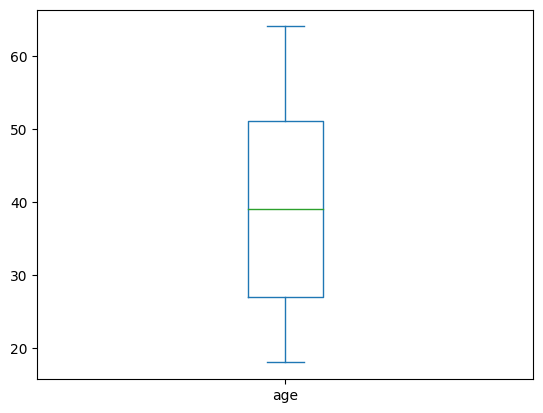

In [ ]:
df.age.plot.box()

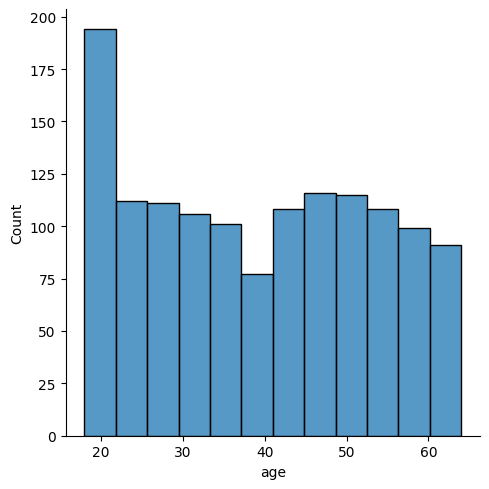

In [ ]:
sns.displot(df.age)

### BMI - details about the bmi column

In [ ]:
df['bmi'].value_counts().head()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
Name: bmi, dtype: int64

In [ ]:
df['bmi'].value_counts().tail()

46.20    1
23.80    1
44.77    1
32.12    1
30.97    1
Name: bmi, dtype: int64

<Axes: >

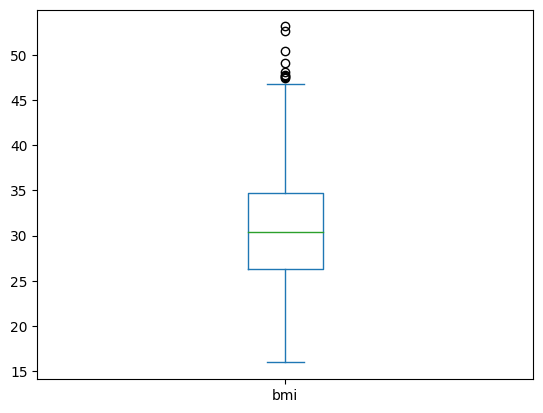

In [ ]:
df.bmi.plot.box()

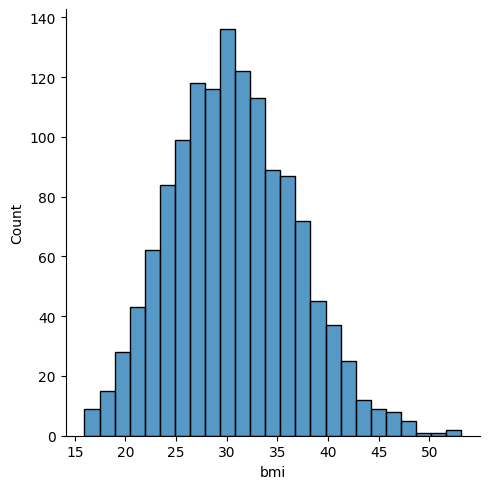

In [ ]:
sns.displot(df.bmi)

### CHILDREN - details about the children column

<Axes: >

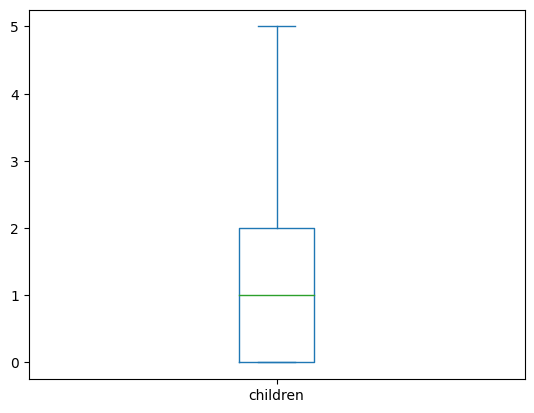

In [ ]:
df.children.plot.box()

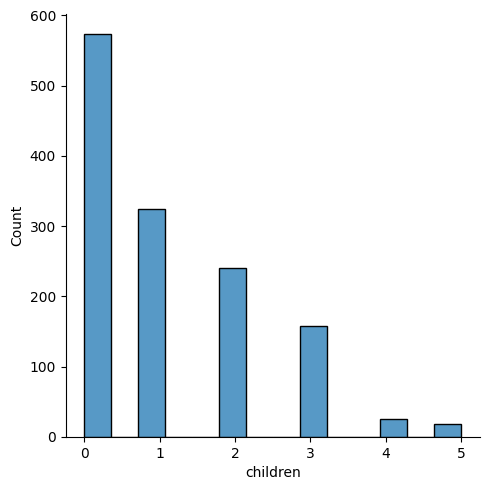

In [ ]:
sns.displot(df.children)

### SEX - details about the sex column

In [ ]:
df.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [ ]:
df.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


### SMOKER - details about the smoker column

In [ ]:
df.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [ ]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


### REGION - details about the region column

In [ ]:
df.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [ ]:
df.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


### CHARGES - details about the charges column (column to be predicted)

In [ ]:
## create a copy of the dataframe

df1 = df.copy()

In [ ]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

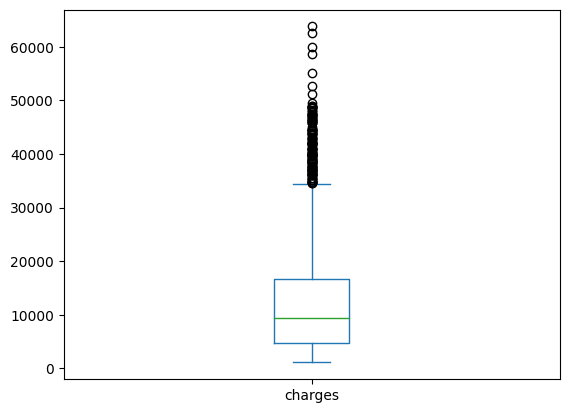

In [ ]:
## checking for outliers

df1.charges.plot.box()

In [ ]:
df1[df1['charges']>25000].shape

(201, 7)

In [ ]:
## removing outliers

df1 = df1[df1['charges']<25000]

<Axes: >

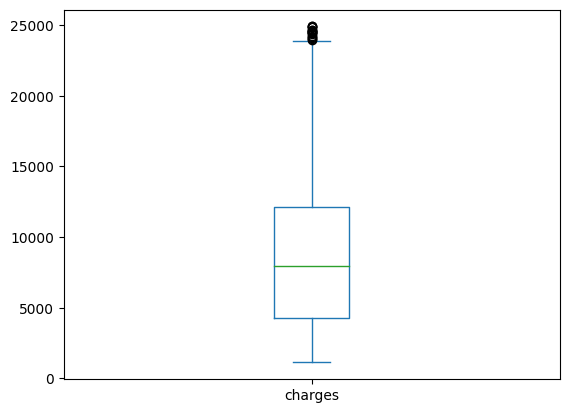

In [ ]:
df1.charges.plot.box()

### LABEL ENCODING

In [ ]:
## encoding all columns with non-numerical values with labels

le = LabelEncoder()

df1['sex'] = le.fit_transform(df1['sex'])
df1['region'] = le.fit_transform(df1['region'])
df1['smoker'] = le.fit_transform(df1['smoker'])

In [ ]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


## RELATIONSHIPS BETWEEN COLUMNS



<Axes: >

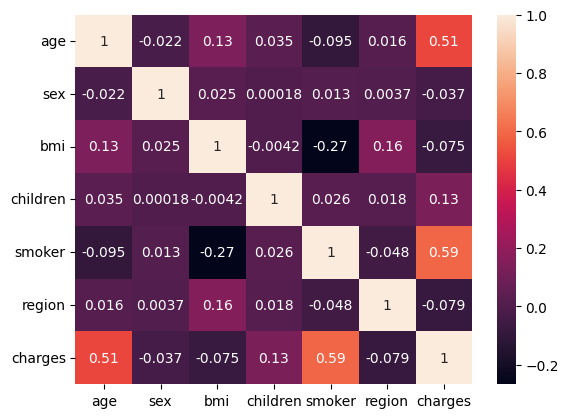

In [ ]:
correlation = df1.corr()
sns.heatmap(correlation, annot = True)

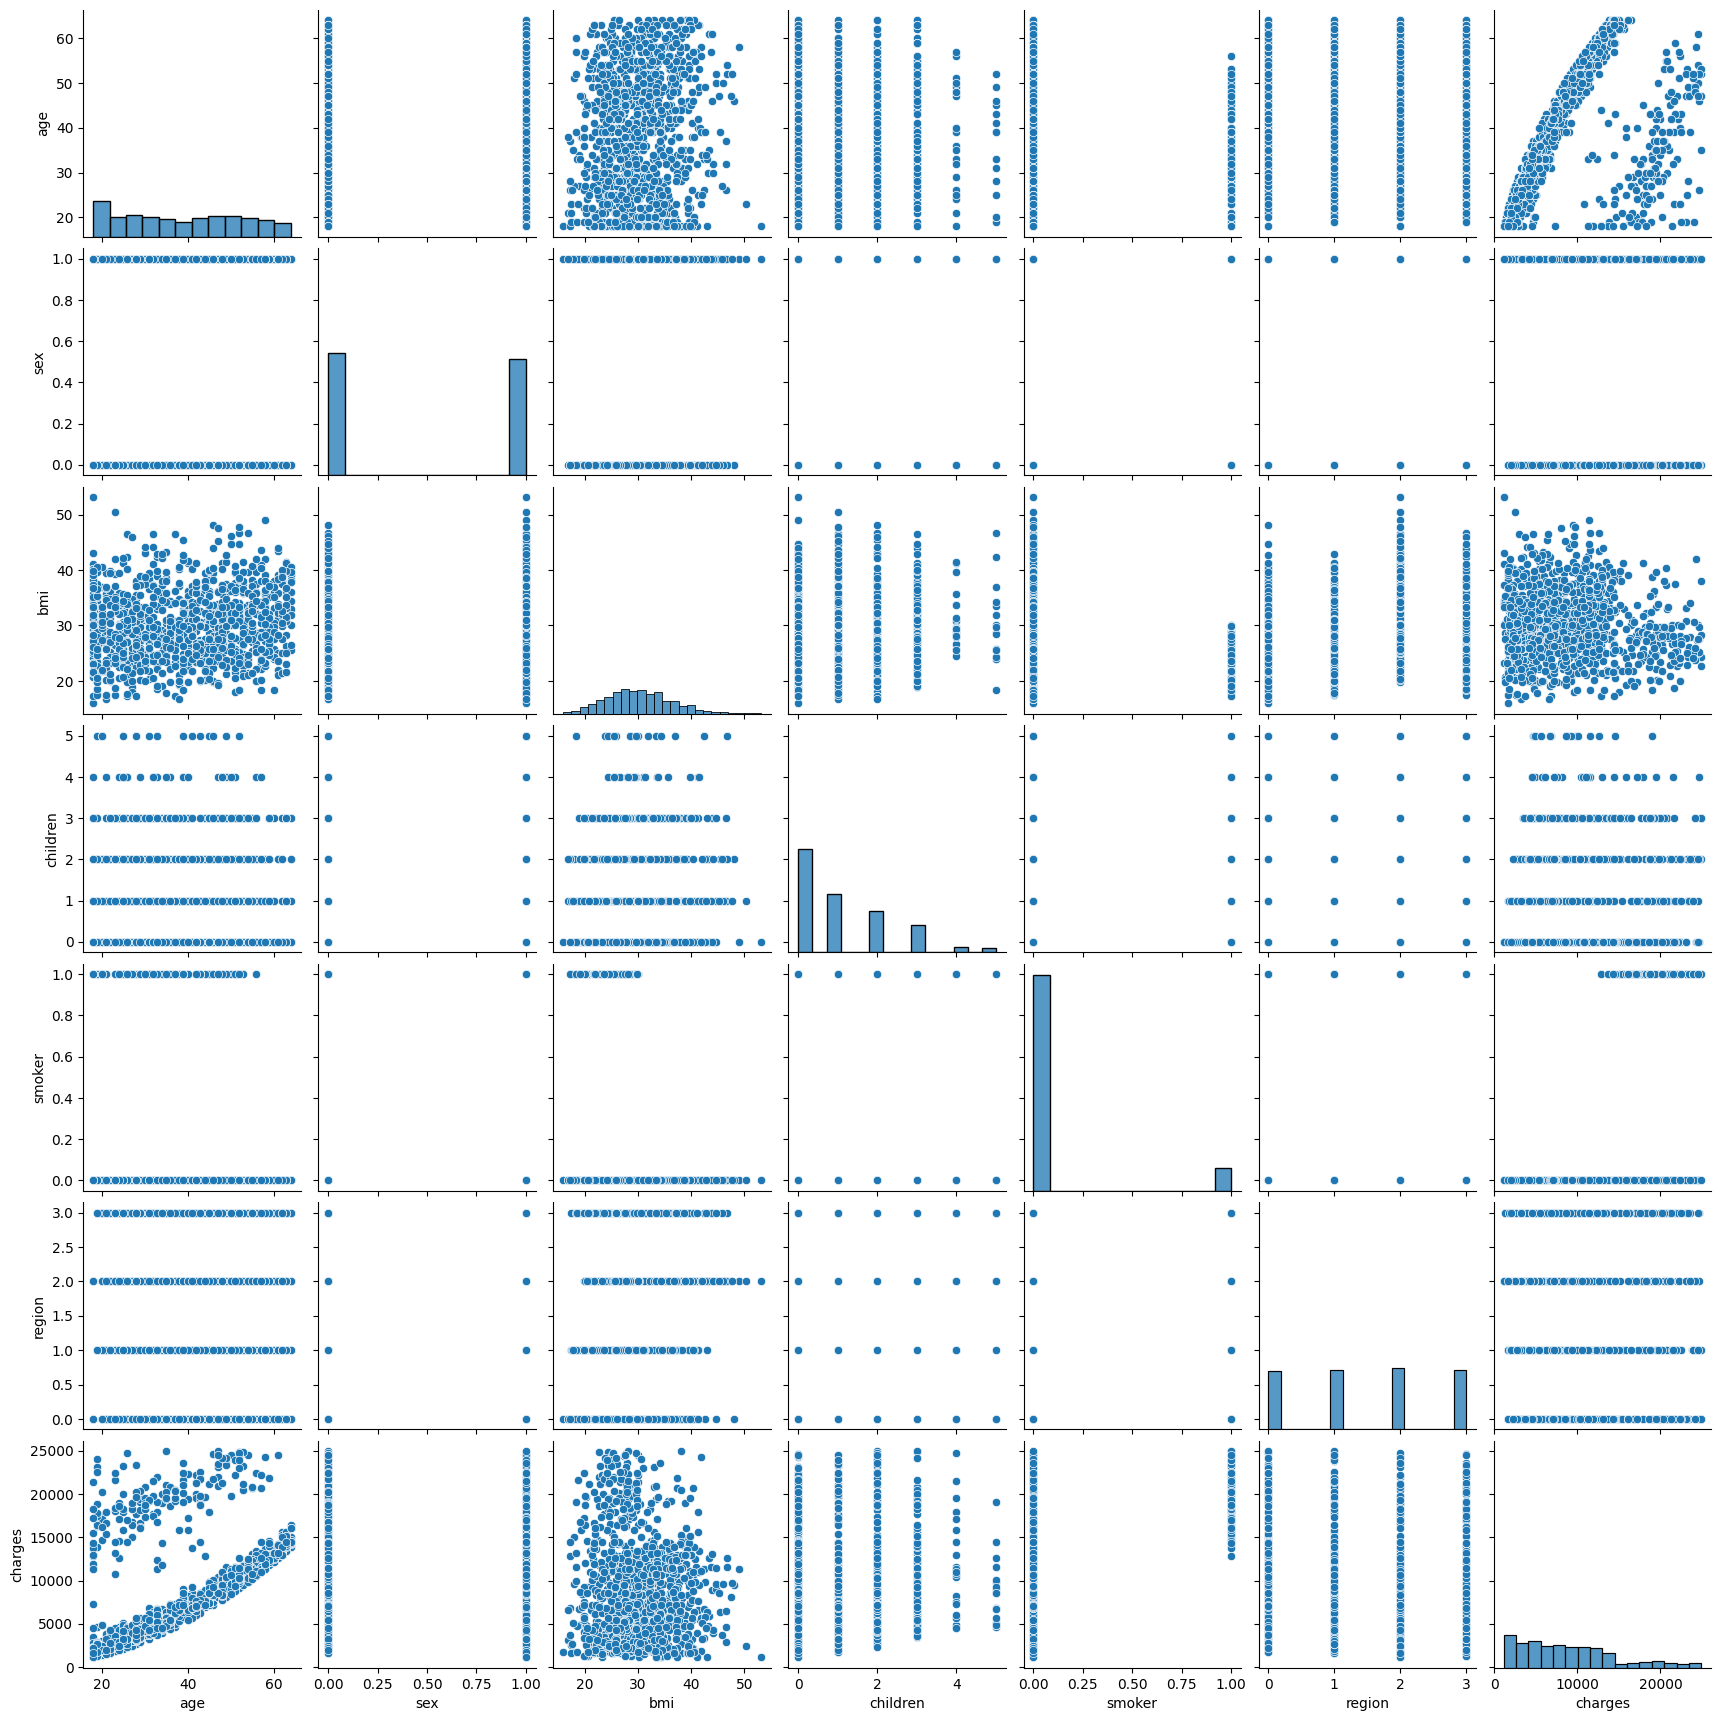

In [ ]:
sns.pairplot(df1)

### ORGANISING AND SCALING TRAINING AND TESTING DATA

In [ ]:
## Setting dependent and independent variables

y = df1.pop('charges')
x = df1

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1137, dtype: float64

In [ ]:
## scaling the columns - standardisation

scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,-1.417225,-0.978249,-0.365854,-0.893591,3.118720,1.340964
1,-1.489443,1.022235,0.599925,-0.073564,-0.320644,0.443039
2,-0.767269,1.022235,0.473238,1.566488,-0.320644,0.443039
3,-0.406183,1.022235,-1.220576,-0.893591,-0.320644,-0.454885
4,-0.478400,1.022235,-0.204616,-0.893591,-0.320644,-0.454885
...,...,...,...,...,...,...
1332,0.965946,-0.978249,2.398214,1.566488,-0.320644,1.340964
1333,0.821512,1.022235,0.139247,1.566488,-0.320644,-0.454885
1334,-1.489443,-0.978249,0.295548,-0.893591,-0.320644,-1.352810
1335,-1.489443,-0.978249,1.106670,-0.893591,-0.320644,0.443039


In [ ]:
## defining testing and training data

x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2, random_state=23)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)

(909, 6)
(228, 6)
(1137, 6)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y.shape)

(909,)
(228,)
(1137,)


### MODEL TRAINING AND TESTING

In [ ]:
## applying linear regression to train model

lr = LinearRegression()

charge = lr.fit(x_train, y_train)

In [ ]:
## testing model

y_pred = charge.predict(x_test)
y_pred

array([ 2966.48389202,  8686.46950384,  4917.14100769,  3244.82544978,
        4729.77786934,  9926.88755018,  9228.2873252 ,  1958.13388859,
       16918.36251766, 10607.38514648,  9812.87147255,  8319.08340855,
        8962.63709387,  8199.90287494,  6930.23526454,  7074.3775703 ,
       13828.41421676, 15711.96061882, 19881.35208243,  7522.79786676,
        8895.41794404,  7999.18297125,  8746.16759627, 10203.99057416,
       11573.97302355,  3371.61901701,  4283.73882346,  6363.19772586,
       15270.09936638, 12323.71895149,  7526.66608311, 10272.25644827,
       10308.72241718, 12103.41846018,  3145.72177102,  9552.0823365 ,
        9107.88539154,  6572.35601754,  5122.09925174,  9521.27429433,
       11983.16808   ,  9441.56388186, 11173.92073227,  9580.73025046,
        3134.10011565, 20611.14092195,  6687.70061962,  9541.03603498,
        8762.69361047,  9046.88825394, 10285.77288795, 11673.02507037,
       11316.9044464 , 11321.24981069, 12078.38784123,  2698.99780918,
      

In [ ]:
y_test

1175     2154.36100
567      7256.72310
1239     3238.43570
137      2045.68525
555      3847.67400
           ...     
408      6652.52880
1075     4562.84210
588     13635.63790
810      9414.92000
1153     5630.45785
Name: charges, Length: 228, dtype: float64

In [ ]:
## checking accuracy of model - about 73%

from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.7312243522488098


In [ ]:
## comparing accuracy with a different model

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
charge = dtr.fit(x_train, y_train)
r2_score(y_test, charge.predict(x_test))

0.50195536521098

### CONCLUSIONS

In [ ]:
## Accuracy of the linear regression model - 73%
## Better than the accuracy of the Decison Tree Model (~50%)